# Lab 1.1 - Cleaning and Analyzing Warehouse Data

## Objective
1. Import a CSV dataset using `pandas`
2. Clean the dataset using multiple techniques
3. Answer questions about using the data. 

*Use the challenge dataset to practice cleaning with regex.*

## Rubric

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

## Pandas reference

In addtion to the methods you learned last lab, you may need the following: 

- `df.dtypes` - the data types of the each column
- `df.columns` - the name of each column
- `df.shape` - the number of rows and columns of the dataset
- `df.dropna()` - removes null values
- `df.isnull()` - returns a dataframe with true/false values based on if the value is null. Can be used in conjuction with `.sum()`
- `pd.todatetime(...)` - sets a given column to a `datetime` object
- `df.column.isunique` - returns True if all data are unique
- `df.column.unique()` - returns all of the uniue values of a column
- `df['col'].replace(...,...)` - replaces values in a column with another value
- `df['col'].value_counts()` - returns the value counts of each unique value
- `df['col'].quantile(0.25)` or `.quartile(0.75) ` - returns the value at 25% or 75% precent    

## Preparing Data

In this section, we will import and prepare our data to be manipulated

Import `pandas` and `matplotlib.pyplot` here.

In [157]:
import pandas as pd
import matplotlib.pyplot as mat

Use `pandas`' `read_csv()` to create a Dataframe called `warehouse`.

In [158]:
warehouse = pd.read_csv("warehouse_data.csv")

Display the first 5 rows of `warehouse`.

In [159]:
warehouse.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Display the column names of the Dataframe. 

In [160]:
warehouse.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

How many data points are in our table?

In [161]:
list = warehouse.shape
points = list[0] * list[1]
print(points)

8000


We can use one command to answer these three questions: 
- What is the average coupon discount?
- What is the largest order price?
- What is the smallest distance to warehouse?

In [162]:
print(f"Average Coupon Discount: ${warehouse['coupon_discount'].mean()}")
print(f"Largest Order Price: ${warehouse['order_price'].max()}")
print(f"Smallest Distance to Warehouse: {warehouse['distance_to_nearest_warehouse'].min()}")

Average Coupon Discount: $10.89
Largest Order Price: $947691
Smallest Distance to Warehouse: 0.1078


## Cleaning Data

**Data cleaning** is the process of removing errors and inaccuracies from data to make it ready for analysis In these next steps, we will explore and clean our dataset. 


Check the dataset for null(or empty) values. How many null values are there and in which columns?

In [163]:
warehouse.isnull().sum()


order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           8
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

So `season` and `latest_customer_review` have missing values. Fill the drop the rows with missing values. You should have 491 rows remaining.

In [164]:
warehouse.dropna()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


Now let's take a look at the data types of each column and see if they make sense.

In [165]:
warehouse.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

Data type of date column is object instead of datetime. So fix this problem and check the datatypes again.

In [166]:
import pandas as pd
warehouse = pd.read_csv("warehouse_data.csv")
pd.to_datetime(warehouse['date'])

0     2019-06-22
1     2019-12-29
2     2019-03-02
3     2019-01-12
4     2019-11-28
         ...    
495   2019-08-07
496   2019-03-28
497   2019-10-16
498   2019-05-19
499   2019-05-25
Name: date, Length: 500, dtype: datetime64[ns]

Now let's check for errors. 

First, let's make sure that our data in `order_id` is unique and we don't have any duplicates. 

In [167]:
warehouse.order_id.is_unique

True

Now, let's check what the unique values of `nearest_warehouse` are.

In [168]:
warehouse.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

Thompson and thompson should be the same, but here they are being counted as different warehouse. Similarly Nickolson and nickolson are same. Change all of the lowercase names to Title case. 

In [169]:
warehouse['nearest_warehouse'] = warehouse['nearest_warehouse'].replace('nickolson','Nickolson')
warehouse['nearest_warehouse'] = warehouse['nearest_warehouse'].replace('thompson','Thompson')

Check the quantities of each `nearest_warehouse`.

In [170]:
warehouse['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     197
Nickolson    184
Bakers       119
Name: count, dtype: int64

The value counts should be Thompson: 192, Nickolson: 183, Bakers: 116

Check the counts and unique values of `is_happy_customer`.

In [171]:
print(warehouse['is_happy_customer'].value_counts())
print(warehouse['is_happy_customer'].unique())

is_happy_customer
True     359
False    141
Name: count, dtype: int64
[ True False]


Create a table with `order_price`, `delivery_charges`, `coupon_discount`, and `order_total`. Look at the first 10 rows. Is the `order_total` column correct?

In [172]:
warehouse.head()
del warehouse['customer_id']
del warehouse['date']
del warehouse['order_id']
warehouse.head()

,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


### Remove Outliers

We are going to remove statistical outliers in `order_total`. To remove outliers, follow this process:

- Find upper and lower quartiles
- Find IQR range
- Find upper and lower limit
- Remove elements 

In [173]:
warehouse['order_total'].quantile([.25, 1])
q1 = warehouse['order_total'].quantile(0.25)
q3 = warehouse['order_total'].quantile(0.75)
iqr = q3 - q1
low_limit = q1 - 1.5 * iqr
up_limit = q3 + 1.5 * iqr
warehouse_clean = warehouse[(warehouse['order_total'] >= low_limit) & (warehouse['order_total'] <= up_limit)]
print(warehouse_clean)

    nearest_warehouse                                      shopping_cart  \
0            Thompson  [('Lucent 330S', 1), ('Thunder line', 2), ('iS...   
1            Thompson        [('Thunder line', 1), ('Universe Note', 2)]   
2           Nickolson               [('Thunder line', 1), ('pearTV', 2)]   
3           Nickolson  [('Universe Note', 1), ('Alcon 10', 2), ('Oliv...   
4           Nickolson  [('Universe Note', 1), ('Olivia x460', 1), ('i...   
..                ...                                                ...   
495         Nickolson             [('Alcon 10', 2), ('iAssist Line', 2)]   
496         Nickolson  [('pearTV', 2), ('Candle Inferno', 2), ('Toshi...   
497         Nickolson  [('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...   
498         Nickolson  [('iStream', 1), ('Candle Inferno', 1), ('iAss...   
499            Bakers  [('iStream', 1), ('Toshika 750', 1), ('Alcon 1...   

     order_price  delivery_charges  customer_lat  customer_long  \
0          12200    

There are 18 records with outliers to remove. 

In [174]:
warehouse_outliers = warehouse[(warehouse['order_total'] < low_limit) | (warehouse['order_total'] > up_limit)]
print(warehouse_outliers)

    nearest_warehouse                                      shopping_cart  \
12           Thompson  [('Alcon 10', 1), ('Universe Note', 1), ('pear...   
31           Thompson  [('Universe Note', 2), ('iAssist Line', 2), ('...   
41          Nickolson  [('Universe Note', 2), ('Candle Inferno', 2), ...   
55          Nickolson  [('Alcon 10', 2), ('Toshika 750', 2), ('pearTV...   
61             Bakers  [('iAssist Line', 2), ('pearTV', 2), ('Thunder...   
81           Thompson  [('pearTV', 2), ('Toshika 750', 1), ('iAssist ...   
204          Thompson               [('iStream', 1), ('Toshika 750', 2)]   
238            Bakers  [('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...   
261            Bakers  [('pearTV', 2), ('Universe Note', 2), ('Thunde...   
267            Bakers  [('Toshika 750', 1), ('Candle Inferno', 1), ('...   
277          Thompson      [('Candle Inferno', 2), ('Universe Note', 2)]   
305            Bakers          [('Thunder line', 1), ('Toshika 750', 2)]   
310         

## Explore Data

Now that our data is clean, we can answer questions about it!

What is the largest order?

In [175]:
warehouse_clean['order_total'].max()

33947.06

What is the smallest order?

In [176]:
warehouse_clean['order_total'].min()

639.29

Without outliers, what are the top 5 most expensive orders?

In [177]:
warehouse_clean.nlargest(5, 'order_total')

,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
487,Thompson,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",33870,77.06,-37.802392,144.998158,0,33947.06,Winter,True,0.8848,misses phone calls i love the features. you ge...,True
276,Thompson,"[('Universe Note', 1), ('iStream', 1), ('Toshi...",21190,66.49,-37.820670,144.941119,15,33706.75,Autumn,False,1.0325,nice phone nice phone did have a few nicks oth...,True
14,Nickolson,"[('pearTV', 2), ('iStream', 1), ('Lucent 330S'...",31900,79.78,-37.809463,144.972367,0,31979.78,Autumn,True,66.6483,"five stars good speed, like stanley",True
10,Bakers,"[('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...",31895,78.25,-37.811334,145.008678,0,31973.25,Winter,True,1.1919,i love this phone it is so user friendly and t...,True
78,Bakers,"[('Lucent 330S', 2), ('pearTV', 2), ('iAssist ...",35205,73.58,-37.808563,145.000167,10,31758.08,Summer,True,0.4624,not as advertised was not actually unlocked an...,False


What warehouse is the closest to most customers? Create a visualization.

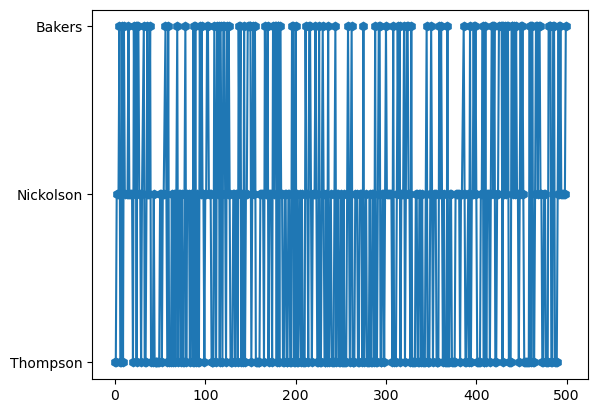

In [178]:
import matplotlib.pyplot as plt
plt.plot(warehouse_clean['nearest_warehouse'], marker='h')
plt.show()

## Pandas reference

In addtion to the methods you learned last lab, you may need the following: 

- `df.dtypes` - the data types of the each column
- `df.columns` - the name of each column
- `df.shape` - the number of rows and columns of the dataset
- `df.dropna()` - removes null values
- `df.isnull()` - returns a dataframe with true/false values based on if the value is null. Can be used in conjuction with `.sum()`
- `pd.to_datetime(...)` - sets a given column to a `datetime` object
- `df.column.is_unique` - returns True if all data are unique
- `df.column.unique()` - returns all of the uniue values of a column
- `df['col'].replace(...,...)` - replaces values in a column with another value
- `df['col'].value_counts()` - returns the value counts of each unique value
- `df['col'].quantile(0.25)` or `.quartile(0.75) ` - returns the value at 25% or 75% precent   
- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order

What percentage of customers are satisfied with their purchase? Create a visualization.

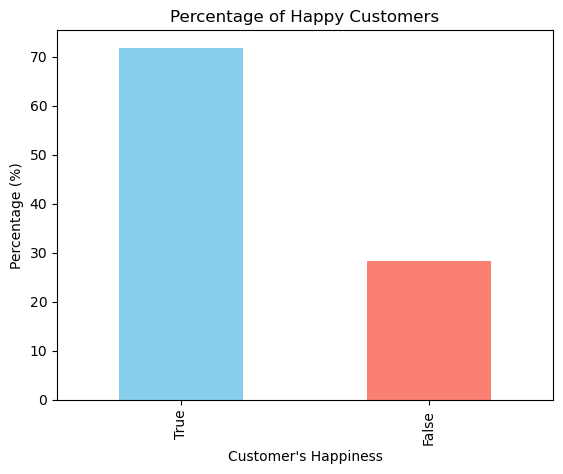

In [185]:
import matplotlib.pyplot as plt

value_counts =  warehouse_clean['is_happy_customer'].value_counts(normalize=True) * 100

ax = value_counts.plot(kind='bar', color=['skyblue','salmon'], legend=False)

ax.set_title("Percentage of Happy Customers")
ax.set_xlabel("Customer's Happiness")
ax.set_ylabel('Percentage (%)')

plt.show()